In [4]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from parse import parse
from utils import generate_palindroms, is_specific

In [6]:
DATA_FILE = "data/restriction_enzymes.txt"

In [7]:
entries = parse(DATA_FILE, expand=False)
expanded_entries = parse(DATA_FILE, expand=True)

In [8]:
len(entries)

28361

In [9]:
len(expanded_entries)

3097775

In [10]:
dna_entries = [x[0] for x in entries]
unique_dna = set(dna_entries)
len(unique_dna)

612

In [11]:
aa_entries = [x[1] for x in entries]
unique_aa = set(aa_entries)
len(unique_aa)

13360

In [12]:
entries_dict = {"dna": [x[0] for x in entries], "aa": [x[1] for x in entries]}
df = pd.DataFrame(entries_dict)
df['len_dna'] = df.apply(lambda x: len(x['dna']), axis=1)
df['len_aa'] = df.apply(lambda x: len(x['aa']), axis=1)

In [13]:
df

,dna,aa,len_dna,len_aa
0,CGGCCG,MQGPELIFVCPKRFYAVDFLKEVIDHCWPGDKPHNPQIAREVKMEG...,6,223
1,CCGG,MMESFSGNRGEWSEPYALFKLLADGQLYLGDAQLNKLGIVMPILSI...,4,358
2,AGGCCT,MAKKTTAFDVFEQCVQAIQAGELIESVSAKDKEFHFQNWFQKRLQS...,6,274
3,GATC,MGKNDTAWETLFERYDILSHIAQTGFYEIDAATIRTVREPRLMSKF...,4,425
4,CCGCGG,MQEKPYNPLEKRNLAISVSDALLERPISKLPPPEPFEGAGIYAIYY...,6,207
...,...,...,...,...
28356,CCWGG,MTNSPIIFQSSCIKTLSAVEARPERSNQHEFNGVRELKYLLGTDGF...,5,131
28357,C,MISQYEYVVRQLARTKNKKHEQYVVTGIVHKLNRDDIKFVTQQYVK...,1,289
28358,CCWGG,MTSTPGTYDTDTAKHISLDQLVALFAGVGATSLYVKKLAPNDNSKN...,5,465
28359,RGCGCY,MRFAEAFPLTPSANEIRRGVLSIPRPDIRQVTLAGESSLTVMADNS...,6,405


<AxesSubplot:xlabel='len_dna', ylabel='Count'>

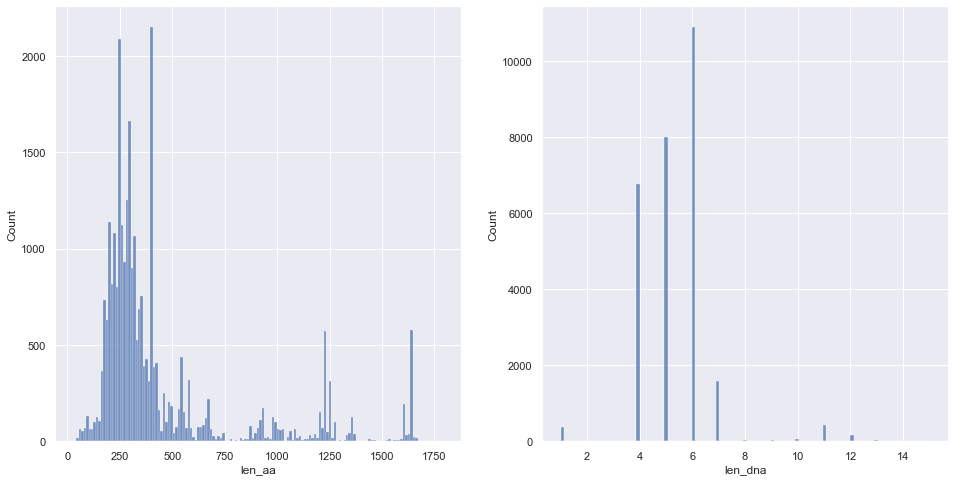

In [14]:
sns.set()
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(1,2)
sns.histplot(data=df, x="len_aa", ax=ax[0])
sns.histplot(data=df, x="len_dna", ax=ax[1])

<AxesSubplot:xlabel='len_dna', ylabel='len_aa'>

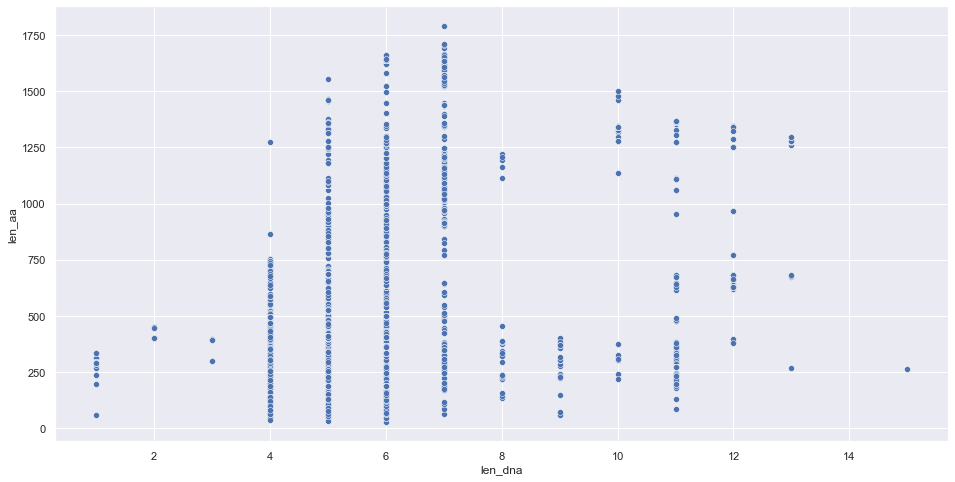

In [15]:
sns.scatterplot(data=df, x="len_dna", y="len_aa")

## Coverage

The set of all palindromic sequences of length N is of size 4^(N-1)

In [36]:
def palindromic_dna_coverage(length: int):
    # collate all dna of specified length
    dna = [x for x in dna_entries if len(x) == length]
    
    # all possible palindroms of same length
    all_palindroms = generate_palindroms(length)
    dna_histogram = {d: 0 for d in all_palindroms}
    
    # create histogram of occurrences for each sequence of length
    for d in dna:
        if d in dna_histogram.keys():
            dna_histogram[d] = dna_histogram[d] + 1
    return pd.DataFrame(data=[(k,v) for k, v in dna_histogram.items()])

[Text(0.5, 0, 'Sequence'), Text(0, 0.5, 'Occurrences')]

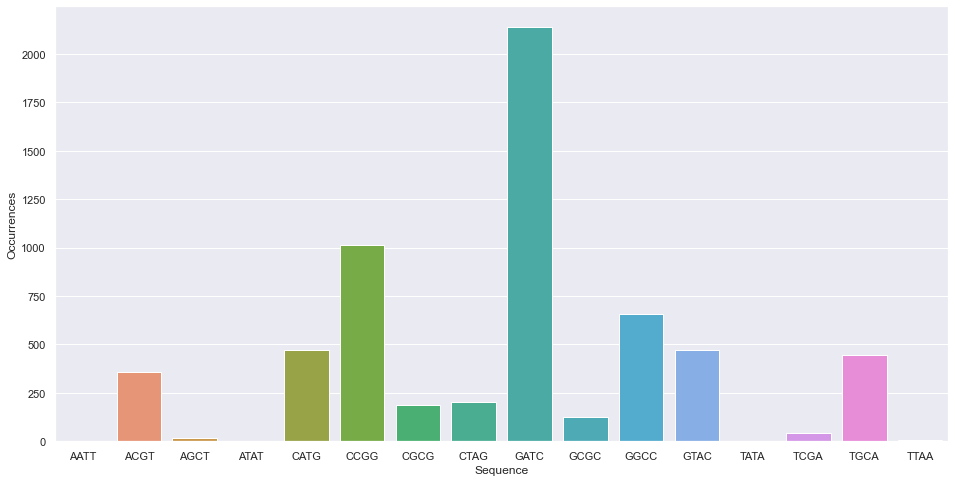

In [40]:
dna_df = palindromic_dna_coverage(4)
ax = sns.barplot(data=dna_df, x=0, y=1)
ax.set(xlabel='Sequence', ylabel='Occurrences')

## Nucleotide Position Distribution

In [ ]:
enzymes = parse(DATA_FILE, expand=False)

In [ ]:
dna_seqs = [x[0] for x in enzymes]

In [ ]:
dna_seqs_8 = [x for x in dna_seqs if len(x) == 8]

In [ ]:
dna_seqs_8